https://machinebox.io/docs/tagbox/recognizing-images

Have an attribute for every identified tag. Allow configurable tags which are always an attribute but have confidence = 0.0 if not detected, allowing a [template binary sensor](https://www.home-assistant.io/components/binary_sensor.template/). 

In [12]:
import requests
import operator
import os
import io
import base64
import pathlib
from PIL import Image
import json
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
print(sys.version)

ENDPOINT = "localhost:8080"
URL = "http://{}/tagbox/check".format(ENDPOINT)
print(URL)
IMG_FILE = "waffle.jpg"
FIG_SIZE = (12, 8)


def print_json(json_data):
    PrettyPrinter().pprint(json_data)

3.6.3 |Anaconda custom (64-bit)| (default, Nov  3 2017, 12:34:11) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
http://localhost:8080/tagbox/check


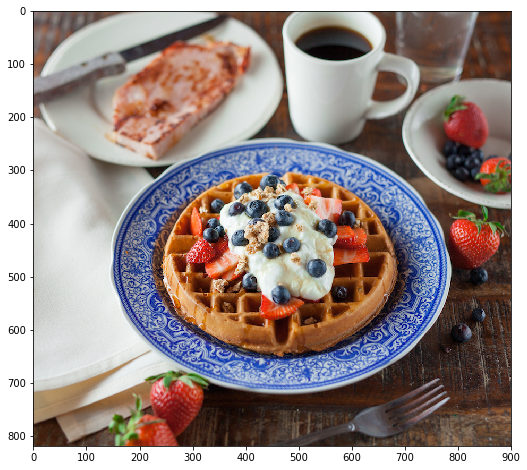

In [13]:
img = plt.imread(IMG_FILE)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

## Post the file

In [14]:
%%time
files = {
    'file': (IMG_FILE, open(IMG_FILE, 'rb')),
}

response = requests.post(URL, files=files).json()

CPU times: user 5.16 ms, sys: 7.85 ms, total: 13 ms
Wall time: 1.52 s


In [15]:
print_json(response)

{'custom_tags': [],
 'success': True,
 'tags': [{'confidence': 0.9323090314865112, 'tag': 'Food'},
          {'confidence': 0.9119579792022705, 'tag': 'Dish'},
          {'confidence': 0.9054304957389832, 'tag': 'Meal'},
          {'confidence': 0.7076804637908936, 'tag': 'Breakfast'},
          {'confidence': 0.6256734728813171, 'tag': 'Cuisine'},
          {'confidence': 0.5702366828918457, 'tag': 'Produce'},
          {'confidence': 0.39323535561561584, 'tag': 'Lunch'}]}


In [16]:
response['success']

True

In [17]:
response['tags']

[{'confidence': 0.9323090314865112, 'tag': 'Food'},
 {'confidence': 0.9119579792022705, 'tag': 'Dish'},
 {'confidence': 0.9054304957389832, 'tag': 'Meal'},
 {'confidence': 0.7076804637908936, 'tag': 'Breakfast'},
 {'confidence': 0.6256734728813171, 'tag': 'Cuisine'},
 {'confidence': 0.5702366828918457, 'tag': 'Produce'},
 {'confidence': 0.39323535561561584, 'tag': 'Lunch'}]

In [19]:
response['tags'][0]['tag'] # The most likely tag

'Food'

In [18]:
{tag['tag']:tag['confidence'] for tag in response['tags']}

{'Breakfast': 0.7076804637908936,
 'Cuisine': 0.6256734728813171,
 'Dish': 0.9119579792022705,
 'Food': 0.9323090314865112,
 'Lunch': 0.39323535561561584,
 'Meal': 0.9054304957389832,
 'Produce': 0.5702366828918457}